In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
gridsearch_data = pd.read_csv('./models/gridsearch.csv')
gridsearch_data.drop(columns=['model_type'], inplace=True) 
gridsearch_data.rename(columns={'lr': 'learning_rate'}, inplace=True)
gridsearch_data

,sequence_length,hidden_dims,num_layers,num_epochs,learning_rate,score
0,10,20,2,80,0.005,0.000649
1,10,20,2,80,0.010,0.000530
2,10,20,2,80,0.015,0.000569
3,10,20,2,80,0.020,0.000583
4,10,20,2,100,0.005,0.000505
...,...,...,...,...,...,...
478,40,36,2,180,0.015,0.000469
479,40,36,2,180,0.020,0.000480
480,50,20,2,80,0.005,0.000558
481,50,20,2,80,0.010,0.000554


In [77]:
gridsearch_data.head()

,sequence_length,hidden_dims,num_layers,num_epochs,learning_rate,score
0,10,20,2,80,0.005,0.000649
1,10,20,2,80,0.010,0.000530
2,10,20,2,80,0.015,0.000569
3,10,20,2,80,0.020,0.000583
4,10,20,2,100,0.005,0.000505


/Users/suraj/miniconda3/envs/streamlit-ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Frequency of Model Score across Grid Search Results')

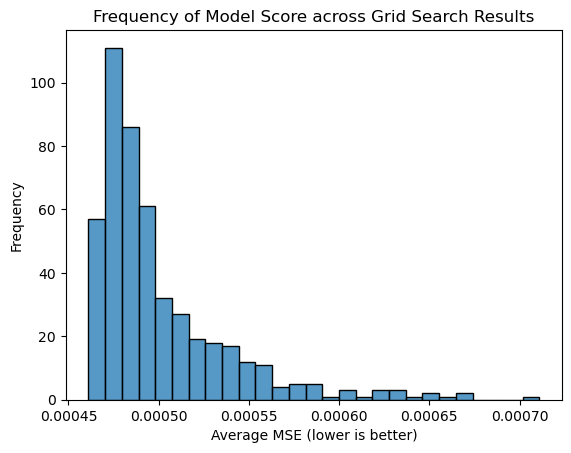

In [71]:
# make histogram of scores
sns.histplot(gridsearch_data['score'])
plt.xlabel('Average MSE (lower is better)')
plt.ylabel('Frequency')
plt.title('Frequency of Model Score across Grid Search Results')

/Users/suraj/miniconda3/envs/streamlit-ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/suraj/miniconda3/envs/streamlit-ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/suraj/miniconda3/envs/streamlit-ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/suraj/miniconda3/envs/streamlit-ai/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

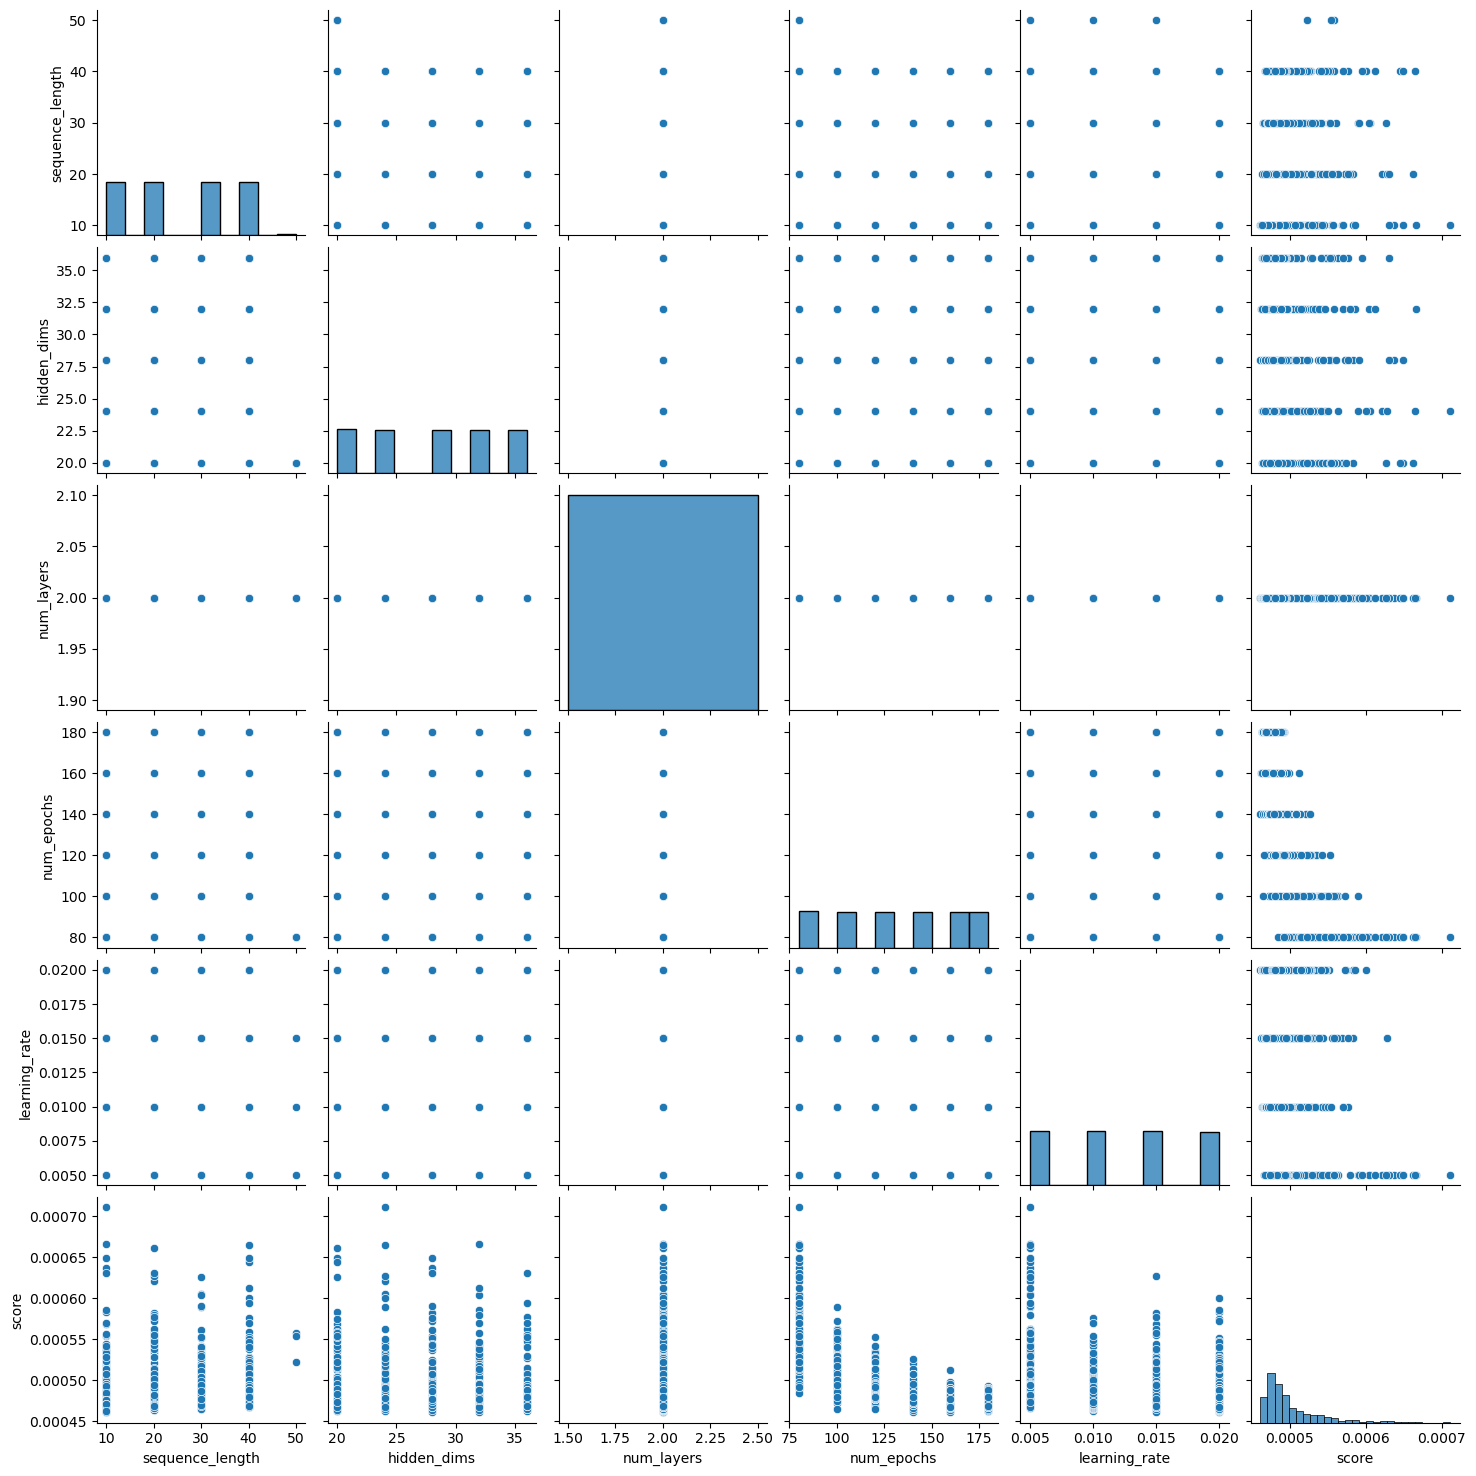

In [72]:
sns.pairplot(gridsearch_data)

<Axes: xlabel='num_epochs', ylabel='score'>

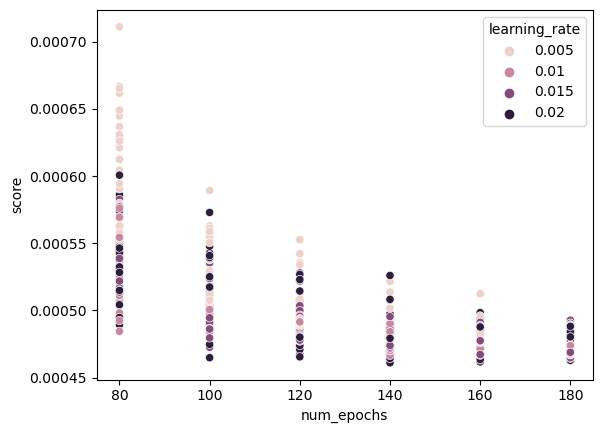

In [73]:
# plot num_epochs vs score
sns.scatterplot(data=gridsearch_data, x='num_epochs', y='score', hue='learning_rate')

In [74]:
# best model
best_model = gridsearch_data.loc[gridsearch_data['score'].idxmin()]
best_model

sequence_length     10.000000
hidden_dims         28.000000
num_layers           2.000000
num_epochs         140.000000
learning_rate        0.020000
score                0.000461
Name: 63, dtype: float64

/var/folders/mz/w4vcy68505xbkskwqmnn1zp40000gn/T/ipykernel_16128/2189060003.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=gridsearch_data, x='num_epochs', y='score', markers=True, palette='viridis',)


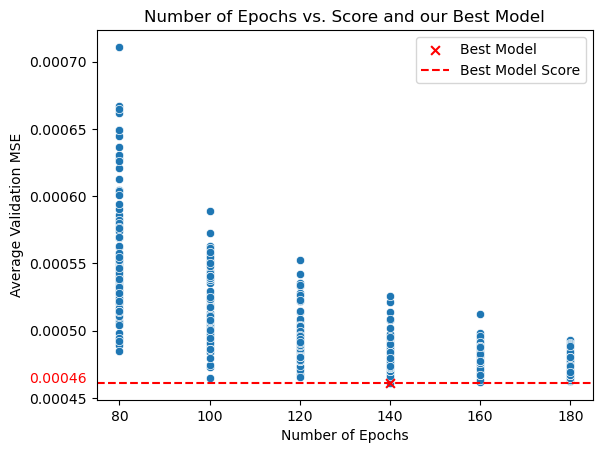

In [75]:
# mark this best model in the graph
sns.scatterplot(data=gridsearch_data, x='num_epochs', y='score', markers=True, palette='viridis',)
# plt.scatter(gridsearch_data['num_epochs'], gridsearch_data['score'], label='Results', marker='.')
plt.scatter(best_model['num_epochs'], best_model['score'], color='red', s=40, marker='x', label='Best Model')
# add horizontal line for best model
plt.axhline(y=best_model['score'], color='red', linestyle='--', label='Best Model Score')
# add a label for this line in the y axis
plt.text(80-20, best_model['score'], f"{best_model['score'].round(5)}", color='red', fontsize=10)
plt.legend()
plt.xlabel("Number of Epochs")
plt.ylabel("Average Validation MSE")
plt.title("Number of Epochs vs. Score and our Best Model")
plt.show()

In [76]:
# round to 5 decimal places
